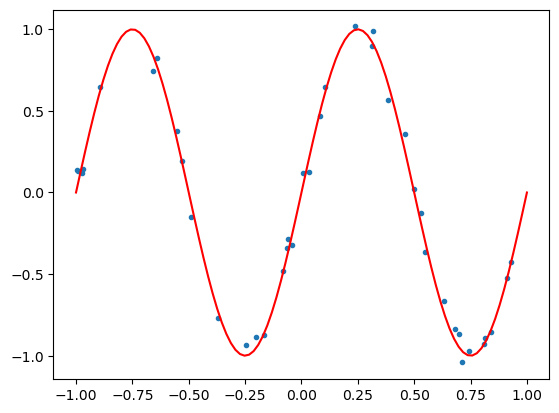

In [9]:
import numpy as np
import matplotlib.pyplot as plt

M=40
Epochs=100
x = np.random.uniform(-1, 1, M)
epsilon = 0.1*np.random.uniform(-1, 1, M)
y = np.sin(2*np.pi*x) + epsilon
plt.plot(x,y, '.')
# regualar grid to actually plot sine function:
xgrid = np.linspace(-1, 1, 100)
ygrid = np.sin(2*np.pi*xgrid)
plt.plot(xgrid, ygrid, 'r')

In [56]:
# initialize weights and total Cost-weight gradients
W1 = 0.9*np.random.uniform(-1, 1, (50, 1))
W2 = 0.9*np.random.uniform(-1, 1, (50, 50))
W3 = 0.9*np.random.uniform(-1, 1, (1, 50))

dC_dW1 = np.zeros((50, 1))
dC_dW2 = np.zeros((50, 50))
dC_dW3 = np.zeros((1, 50))

# initialize bias vectors and total Cost-bias gradients
b1 = 0.1*np.random.uniform(-1, 1, (50, 1))
b2 = 0.1*np.random.uniform(-1, 1, (50, 1))
b3 = 0.1*np.random.uniform(-1, 1, (1, 1))

dC_db1 = np.zeros((50, 1))
dC_db2 = np.zeros((50, 1))
dC_db3 = np.zeros((1, 1))

# define learning rate
alpha = 0.01

In [20]:
def fnn(x,w1,w2,w3,b1,b2,b3,sigma):
    y_hat=w3@sigma(w2@sigma(w1*x+b1)+b2)+b3
    return(y_hat)

In [21]:
def sin_true(x):
    return(np.sin(2*np.pi*x))

In [22]:
def loss(y,y_hat):
    return((y-y_hat)**2)

In [23]:
def sigma(z):
  return np.tanh(z)

def sigma_prime(z):
  return 1 - np.tanh(z)**2

In [24]:
x[0]

0.810566361192393

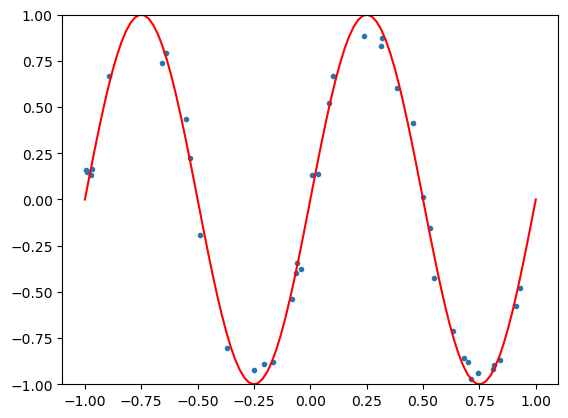

In [57]:

import os,shutil
shutil.rmtree("_PNG")
os.mkdir("_PNG")
Epochs=200
for epoch in range(Epochs):
  for i in range(M): # loop over samples
    y_hat=fnn(y[i],W1,W2,W3,b1,b2,b3,sigma)
    C=loss(sin_true(x[i]),y_hat)
    delta3=-1*(sin_true(x[i])-y_hat)
    delta2=W3.T@delta3*sigma_prime(W2@sigma(W1*y[i]+b1)+b2)
    delta1=W2.T@delta2*sigma_prime(W1*y[i]+b1)
    dc_dw3=delta3@(sigma(W2@sigma(W1*y[i]+b1)+b2)).T
    dc_dw2=delta2@(sigma(W1*y[i]+b1)).T
    dc_dw1=delta1*(W1*y[i]+b1)
    dC_dW1+=dc_dw1
    dC_dW2+=dc_dw2
    dC_dW3+=dc_dw3
    dC_db1+=delta1
    dC_db2+=delta2
    dC_db3+=delta3
  dC_dW1/=M
  dC_dW2/=M
  dC_dW3/=M
  dC_db1/=M
  dC_db2/=M
  dC_db3/=M
  W1=W1-alpha*dC_dW1
  W2=W2-alpha*dC_dW2
  W3=W3-alpha*dC_dW3
  b1=b1-alpha*dC_db1
  b2=b2-alpha*dC_db2
  b3=b3-alpha*dC_db3
  dC_dW1[:,:]=0
  dC_dW2[:,:]=0
  dC_dW3[:,:]=0
  dC_db1[:,:]=0
  dC_db2[:,:]=0
  dC_db3[:,:]=0
  y_hat=fnn(y,W1,W2,W3,b1,b2,b3,sigma)
  plt.clf()
  plt.plot(x,y_hat[0,:], '.')
# regualar grid to actually plot sine function:
  xgrid = np.linspace(-1, 1, 100)
  ygrid = np.sin(2*np.pi*xgrid)
  plt.plot(xgrid, ygrid, 'r')
  plt.ylim([-1,1])
  plt.savefig(f"_PNG/HW4_epoch_{str(epoch).zfill(4)}.png")


In [58]:
import imageio
import os
images=[]
files=os.listdir("_PNG")
files.sort()
files = [f for f in files if os.path.isfile(f"_PNG/{f}")]
print(files)
for filename in files:
    
    images.append(imageio.imread(f"_PNG/{filename}"))
imageio.mimsave("_GIFS/try_1.gif", images)

['HW4_epoch_0000.png', 'HW4_epoch_0001.png', 'HW4_epoch_0002.png', 'HW4_epoch_0003.png', 'HW4_epoch_0004.png', 'HW4_epoch_0005.png', 'HW4_epoch_0006.png', 'HW4_epoch_0007.png', 'HW4_epoch_0008.png', 'HW4_epoch_0009.png', 'HW4_epoch_0010.png', 'HW4_epoch_0011.png', 'HW4_epoch_0012.png', 'HW4_epoch_0013.png', 'HW4_epoch_0014.png', 'HW4_epoch_0015.png', 'HW4_epoch_0016.png', 'HW4_epoch_0017.png', 'HW4_epoch_0018.png', 'HW4_epoch_0019.png', 'HW4_epoch_0020.png', 'HW4_epoch_0021.png', 'HW4_epoch_0022.png', 'HW4_epoch_0023.png', 'HW4_epoch_0024.png', 'HW4_epoch_0025.png', 'HW4_epoch_0026.png', 'HW4_epoch_0027.png', 'HW4_epoch_0028.png', 'HW4_epoch_0029.png', 'HW4_epoch_0030.png', 'HW4_epoch_0031.png', 'HW4_epoch_0032.png', 'HW4_epoch_0033.png', 'HW4_epoch_0034.png', 'HW4_epoch_0035.png', 'HW4_epoch_0036.png', 'HW4_epoch_0037.png', 'HW4_epoch_0038.png', 'HW4_epoch_0039.png', 'HW4_epoch_0040.png', 'HW4_epoch_0041.png', 'HW4_epoch_0042.png', 'HW4_epoch_0043.png', 'HW4_epoch_0044.png', 'HW4_epoc

/var/folders/ws/b5qjqyms2c11lb15pc6lklw40000gn/T/ipykernel_17958/637610131.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"_PNG/{filename}"))
